In [2]:
import scrublet as scr

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import scanpy as sc

In [ ]:
# Pilot 1

In [20]:
adata1 = sc.read_10x_mtx('../../../Lab_datasets/CITEseq_pilot/SN0231064/KW9100_Maria/210726_10X_KW9100-2_bcl/cellranger-6.0.1/GRCh38/BRI-1283/outs/filtered_feature_bc_matrix/')

In [21]:
adata1

AnnData object with n_obs × n_vars = 13946 × 36601
    var: 'gene_ids', 'feature_types'

In [22]:
scrub1 = scr.Scrublet(adata1.X, expected_doublet_rate = 0.1)

In [35]:
adata1.obs['doublet_score'], adata1.obs['predicted_doublets'] = scrub1.scrub_doublets(min_gene_variability_pctl=60, n_prin_comps=20, min_cells=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.57
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 11.8%
Elapsed time: 17.1 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

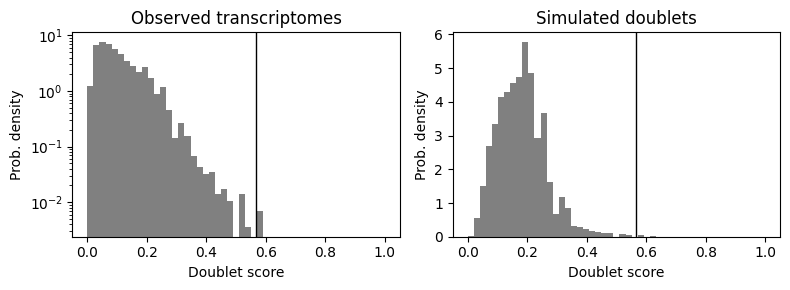

In [36]:
scrub1.plot_histogram()

In [37]:
pd.DataFrame(adata1.obs).to_csv("./scrublet_calls_pilot1.tsv", sep = '\t', header = True)

In [ ]:
# Pilot 2

In [29]:
adata2 = sc.read_10x_mtx('../../../Lab_datasets/CITEseq_pilot_2/SN0257788/broad/hptmp/curtism/bwh10x/KW10170_Maria/220617_10X_KW10170_bcl/cellranger-6.1.1/GRCh38/BRI-1743_hashing/outs/filtered_feature_bc_matrix/')

In [30]:
adata2

AnnData object with n_obs × n_vars = 10562 × 36601
    var: 'gene_ids', 'feature_types'

In [31]:
scrub2 = scr.Scrublet(adata2.X, expected_doublet_rate = 0.1)

In [32]:
adata2.obs['doublet_score'], adata2.obs['predicted_doublets'] = scrub2.scrub_doublets(min_gene_variability_pctl=50, n_prin_comps=20, min_cells=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.37
Detected doublet rate = 3.8%
Estimated detectable doublet fraction = 39.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 9.8%
Elapsed time: 26.6 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

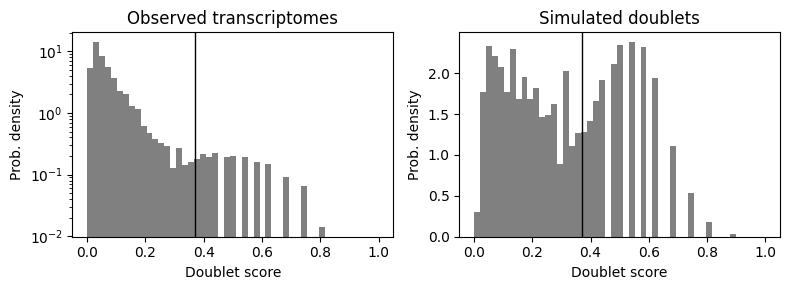

In [33]:
scrub2.plot_histogram()

In [17]:
adata2.obs

,doublet_score,predicted_doublets
AAACCTGAGAAGCCCA-1,0.019589,False
AAACCTGAGAAGGACA-1,0.026521,False
AAACCTGAGAATGTTG-1,0.137725,False
AAACCTGAGATCTGCT-1,0.051992,False
AAACCTGAGCCGGTAA-1,0.096591,False
...,...,...
TTTGTCAGTTAAGACA-1,0.297180,False
TTTGTCAGTTACCGAT-1,0.016529,False
TTTGTCAGTTGGTGGA-1,0.030468,False
TTTGTCATCAGCTCGG-1,0.031301,False


In [34]:
pd.DataFrame(adata2.obs).to_csv("./scrublet_calls_pilot2.tsv", sep = '\t', header = True)

In [ ]:
# Using QC'ed data

In [6]:
adata1qc = sc.read_10x_mtx('./mtx_pilot1')
adata2qc = sc.read_10x_mtx('./mtx_pilot2')

In [7]:
adata1qc

AnnData object with n_obs × n_vars = 9792 × 36601
    var: 'gene_ids'

In [8]:
adata2qc

AnnData object with n_obs × n_vars = 9815 × 36601
    var: 'gene_ids'

In [9]:
scrub1qc = scr.Scrublet(adata1qc.X, expected_doublet_rate = 0.1)
scrub2qc = scr.Scrublet(adata2qc.X, expected_doublet_rate = 0.1)

In [14]:
adata1qc.obs['doublet_score'], adata1qc.obs['predicted_doublets'] = scrub1qc.scrub_doublets(min_gene_variability_pctl=50, n_prin_comps=20, min_cells=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 15.2 seconds


In [11]:
adata2qc.obs['doublet_score'], adata2qc.obs['predicted_doublets'] = scrub2qc.scrub_doublets(min_gene_variability_pctl=50, n_prin_comps=20, min_cells=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 4.8%
Estimated detectable doublet fraction = 50.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 9.4%
Elapsed time: 19.1 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

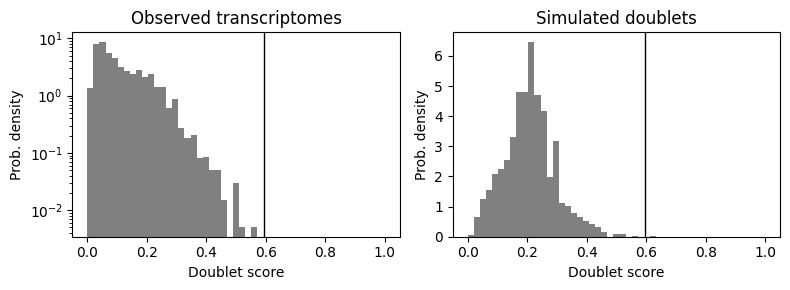

In [15]:
scrub1qc.plot_histogram()

(<Figure size 800x300 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

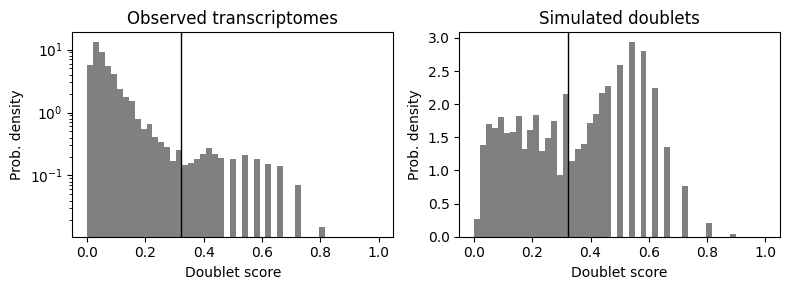

In [13]:
scrub2qc.plot_histogram()

In [16]:
pd.DataFrame(adata1qc.obs).to_csv("./scrublet_calls_pilot1_QC.tsv", sep = '\t', header = True)
pd.DataFrame(adata2qc.obs).to_csv("./scrublet_calls_pilot2_QC.tsv", sep = '\t', header = True)